In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import requests 
import io
import seaborn as sns
import matplotlib

In [ ]:
# !pip install folium==0.2.1
# !pip install pdflatex
# !sudo apt-get install texlive-latex-recommended 
# !sudo apt install texlive-latex-extra
# !sudo apt install dvipng

Selecting previously unselected package tipa.
Preparing to unpack .../20-tipa_2%3a1.3-20_all.deb ...
Unpacking tipa (2:1.3-20) ...
Setting up libjs-jquery (3.2.1-1) ...
Setting up texlive-pictures (2017.20180305-1) ...
Setting up tex-gyre (20160520-1) ...
Setting up tipa (2:1.3-20) ...
Regenerating '/var/lib/texmf/fmtutil.cnf-DEBIAN'... done.
Regenerating '/var/lib/texmf/fmtutil.cnf-TEXLIVEDIST'... done.
update-fmtutil has updated the following file(s):
	/var/lib/texmf/fmtutil.cnf-DEBIAN
	/var/lib/texmf/fmtutil.cnf-TEXLIVEDIST
If you want to activate the changes in the above file(s),
you should run fmtutil-sys or fmtutil.
Setting up preview-latex-style (11.91-1ubuntu1) ...
Setting up fonts-texgyre (20160520-1) ...
Setting up fonts-lato (2.0-2) ...
Setting up ruby-did-you-mean (1.2.0-2) ...
Setting up ruby-net-telnet (0.1.1-2) ...
Setting up rubygems-integration (1.11) ...
Setting up javascript-common (11) ...
Setting up texlive-fonts-recommended (2017.20180305-1) ...
Setting up texlive

In [ ]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [ ]:
activity = pd.read_csv("/content/drive/MyDrive/text gcn/created_csv/ironmarch/orig_score_activity.csv")

In [ ]:
rec_pop = pd.read_csv("/content/drive/MyDrive/text gcn/created_csv/ironmarch/orig_score_rec_pop.csv")

In [ ]:
activity.drop(activity.columns[[0, 3]], axis =1, inplace=True)

In [ ]:
rec_pop.drop(rec_pop.columns[[0, 3, 5]], axis =1, inplace=True)

In [ ]:
activity

,member_id,posts,#message_posts,#notifs,#posts,total_content,activity,n_activity
0,1,5613,401.0,1135.0,5584.0,7120.0,9.870663,1.000000
1,2,1267,80.0,1.0,1270.0,1351.0,8.208600,0.812634
2,3,487,49.0,3.0,484.0,536.0,7.284134,0.708418
3,4,1704,76.0,17.0,1703.0,1796.0,8.493317,0.844730
4,5,463,1.0,0.0,459.0,460.0,7.131226,0.691180
...,...,...,...,...,...,...,...,...
758,9956,0,0.0,0.0,0.0,0.0,0.000000,0.000000
759,9957,0,0.0,0.0,0.0,0.0,0.000000,0.000000
760,9959,0,0.0,0.0,0.0,0.0,0.000000,0.000000
761,9958,0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [ ]:
rec_pop

,member_id,name,last_post,last_activity,members_profile_views,months_activity_period,recency,n_recency,popular,n_popular
0,1,Alexander Slavros,1.458503e+09,1458843863,109177,55.170310,0.054744,1.000000,16.611151,1.000000
1,2,Kacen,1.443205e+09,1458153680,11420,54.903908,0.053958,0.980808,14.348707,0.855075
2,3,Blood and Iron,1.449196e+09,1453861982,4467,53.244973,0.049532,0.872828,13.379374,0.792983
3,4,Mierce,1.456787e+09,1458142748,7483,54.893323,0.053945,0.980508,13.925781,0.827984
4,5,Will to Power,1.327590e+09,1328493137,1318,4.873472,0.014587,0.020119,9.767641,0.561627
...,...,...,...,...,...,...,...,...,...,...
758,9956,Hagan,0.000000e+00,1458770188,16,0.204621,0.054659,0.997925,2.098612,0.070374
759,9957,TheGreatJeff,0.000000e+00,1458337699,11,0.004155,0.054165,0.985871,0.000000,0.000000
760,9959,Kokuryukai,0.000000e+00,1458377324,2,0.000000,0.054210,0.986966,0.000000,0.000000
761,9958,BlackNazi,0.000000e+00,1458750459,36,0.155149,0.054636,0.997370,2.791759,0.114774


In [ ]:
score = activity.merge(rec_pop, on="member_id", how="inner")

In [ ]:
score["score"] = score["n_activity"] + score["n_popular"]+ score["n_recency"]

In [ ]:
fig = plt.figure()
plt.hist(score["n_activity"])
plt.xlabel("Normalised Activity")
plt.ylabel("Count of People")
# 7.1413in
fig.set_size_inches(w=3.48761, h=2.2)

In [ ]:
# plt.savefig('histogram.pgf')

In [ ]:
plt.hist(score["n_popular"])
plt.xlabel("Normalised Popularity")
plt.ylabel("Count of People")

Text(5.388440000000001, 0.5, 'Count of People')

Text(0, 0.5, 'Count of People')

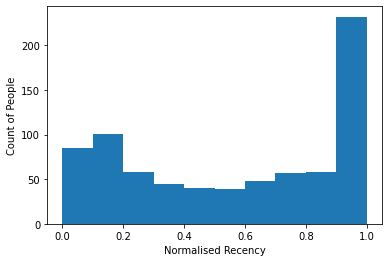

In [ ]:
plt.hist(score["n_recency"])
plt.xlabel("Normalised Recency")
plt.ylabel("Count of People")

Text(0, 0.5, 'Count of People')

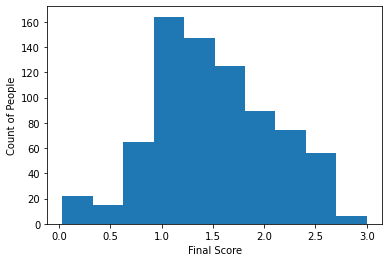

In [ ]:
plt.hist(score["score"], bins=10)
plt.xlabel("Final Score")
plt.ylabel("Count of People")

In [ ]:
score = score.sort_values(by=['score'])

In [ ]:
score

,member_id,posts,#message_posts,#notifs,#posts,total_content,activity,n_activity,name,last_post,last_activity,members_profile_views,months_activity_period,recency,n_recency,popular,n_popular,score
0,1,5613,401.0,1135.0,5584.0,7120.0,9.870663,1.000000,Alexander Slavros,1.458503e+09,1458843863,109177,55.170310,0.054744,1.000000,16.611151,1.000000,3.000000
1,2,1267,80.0,1.0,1270.0,1351.0,8.208600,0.812634,Kacen,1.443205e+09,1458153680,11420,54.903908,0.053958,0.980808,14.348707,0.855075,2.648517
2,3,487,49.0,3.0,484.0,536.0,7.284134,0.708418,Blood and Iron,1.449196e+09,1453861982,4467,53.244973,0.049532,0.872828,13.379374,0.792983,2.374229
3,4,1704,76.0,17.0,1703.0,1796.0,8.493317,0.844730,Mierce,1.456787e+09,1458142748,7483,54.893323,0.053945,0.980508,13.925781,0.827984,2.653222
4,5,463,1.0,0.0,459.0,460.0,7.131226,0.691180,Will to Power,1.327590e+09,1328493137,1318,4.873472,0.014587,0.020119,9.767641,0.561627,1.272926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,9956,0,0.0,0.0,0.0,0.0,0.000000,0.000000,Hagan,0.000000e+00,1458770188,16,0.204621,0.054659,0.997925,2.098612,0.070374,1.068298
759,9957,0,0.0,0.0,0.0,0.0,0.000000,0.000000,TheGreatJeff,0.000000e+00,1458337699,11,0.004155,0.054165,0.985871,0.000000,0.000000,0.985871
761,9958,0,0.0,0.0,0.0,0.0,0.000000,0.000000,BlackNazi,0.000000e+00,1458750459,36,0.155149,0.054636,0.997370,2.791759,0.114774,1.112144
760,9959,0,0.0,0.0,0.0,0.0,0.000000,0.000000,Kokuryukai,0.000000e+00,1458377324,2,0.000000,0.054210,0.986966,0.000000,0.000000,0.986966


In [ ]:
score.to_csv("/content/drive/MyDrive/text gcn/score/ironmarch/orig_scores.csv")

In [ ]:
score = score.sort_values(by=['member_id'])
score['score'].to_csv("/content/drive/MyDrive/text gcn/score/ironmarch/tsv_like_orig_scores.csv", sep=' ')

In [ ]:
just_score = pd.read_csv("/content/drive/MyDrive/text gcn/score/ironmarch/tsv_like_orig_scores.csv", sep=' ')

In [ ]:
just_score

,Unnamed: 0,score
0,0,3.000000
1,1,2.648517
2,2,2.374229
3,3,2.653222
4,4,1.272926
...,...,...
758,758,1.068298
759,759,0.985871
760,761,1.112144
761,760,0.986966
